# Chapter 3

## Perceptron

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

rng = np.random.RandomState(123)

d = 2
N = 10
mean = 5

x1 = rng.randn(N,d) + np.array([0,0])
x2= rng.randn(N,d) + np.array([mean,mean])

In [3]:
x = np.concatenate((x1,x2), axis=0)

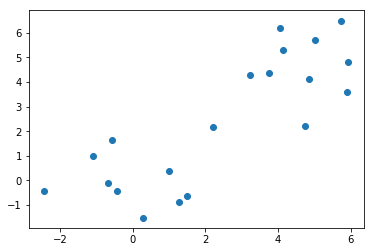

In [4]:
plt.scatter(x[:,0], x[:,1])

In [5]:
w = np.zeros(d)
b = 0

In [6]:
def y(x):
    return step(np.dot(w,x) + b)

def step(x):
    return 1 * (x > 0)

In [7]:
def t(i):
    if i < N:
        return 0
    else:
        return 1

In [8]:
while True:
    classified = True
    for i in range(N*2):
        delta_w = (t(i) - y(x[i])) * x[i]
        delta_b = (t(i) - y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w == 0) * (delta_b == 0)
    if classified:
        break

In [9]:
print(w,b)

[ 2.14037745  1.2763927 ] -9


w[0] x1 + w[1] x2 - 9 = 0

In [10]:
def classifier(x):
    y = - (w[0]*x - 9) / w[1]
    return y

In [11]:
x2 = np.linspace(-3,6,10)

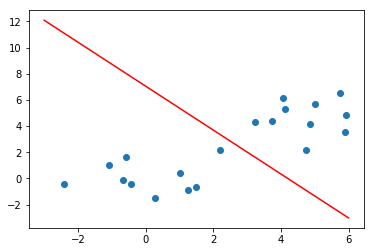

In [12]:
plt.scatter(x[:,0], x[:,1])
plt.plot(x2, classifier(x2), "r-")

## Logistic Regression

### TensofFlow implementation

In [13]:
import numpy as np
import tensorflow as tf

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [14]:
tf.set_random_seed(0)

w = tf.Variable( tf.zeros([2,1]) )
b = tf.Variable( tf.zeros([1]) )

x = tf.placeholder( tf.float32, shape=[None,2] )
t = tf.placeholder( tf.float32, shape=[None,1] )
y = tf.nn.sigmoid( tf.matmul(x,w) + b )

cross_entropy = - tf.reduce_sum( t * tf.log(y) + (1 - t) * tf.log(1 - y) )
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal( tf.to_float( tf.greater(y, 0.5) ), t )

In [15]:
X = np.array( [[0,0],[0,1],[1,0],[1,1]] )
Y = np.array( [[0],[1],[1],[1]] )

In [16]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(200):
    sess.run(train_step, feed_dict={x: X, t: Y})

In [17]:
classified = correct_prediction.eval( session=sess, feed_dict={x:X, t:Y} )
prob = y.eval( session=sess, feed_dict={x:X} )

print('classified: \n', classified)
print()
print('output prob: \n', prob)

classified: 
 [[ True]
 [ True]
 [ True]
 [ True]]

output prob: 
 [[ 0.22355038]
 [ 0.91425949]
 [ 0.91425949]
 [ 0.99747425]]


### Keras implementation

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [19]:
np.random.seed(0)

In [20]:
model = Sequential([
    Dense(input_dim=2, units=1)
    , Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

In [21]:
X = np.array( [[0,0],[0,1],[1,0],[1,1]] )
Y = np.array( [[0],[1],[1],[1]] )

In [22]:
model.fit(X, Y, epochs=200, batch_size=1)

Epoch 1/200
4/4 [==============================] - 0s 57ms/step - loss: 0.6378
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5876
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5494
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5195
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4957
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4763
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4609
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4480
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4363
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4262
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4176
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4095
Epoch 13/200
4/4 [==============================] - 0s 2ms/s

4/4 [==============================] - 0s 2ms/step - loss: 0.1764
Epoch 105/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1753
Epoch 106/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1742
Epoch 107/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1731
Epoch 108/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1720
Epoch 109/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1709
Epoch 110/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1699
Epoch 111/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1688
Epoch 112/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1678
Epoch 113/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1668
Epoch 114/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1658
Epoch 115/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1648
Epoch 116/200
4/4 [==============================] - 0

In [23]:
classes = model.predict_classes(X, batch_size=1)
prob = model.predict_proba(X, batch_size=1)

print('classified: \n', Y==classes)
print()
print('output prob: \n', prob)

classified: 
 [[ True]
 [ True]
 [ True]
 [ True]]

output prob: 
 [[ 0.21971275]
 [ 0.91219962]
 [ 0.91892707]
 [ 0.99761462]]
